# Analisi dei dati di diffusione del COVID-19

## Consegna
Analisi diffusione COVID-19 nel mondo con report specifici su singoli paesi, aree, continenti. Lo studente è chiamato a sviluppare funzioni per analizzare il dataset fornito in input. La scelta delle misure statistiche da implementare è libera (si riportano come suggerimento: media, mediana, deviazione standard, valore massimo, valore minimo, percentuale sul totale, ecc. e i relativi confronti tra le misure). Vincolo: devono essere funzioni che prevedono analisi e confronti su almeno due paesi e due continenti diversi. Giustificare le scelte eseguite.
I dataset sono disponibili sul sito: https://github.com/owid/covid-19-data/tree/master/public/data

## Scelta dei dataset
La scelta dei Paesi da confrontare è ricaduta su Indonesia e Thailandia, poiché sono entrambi paesi molto popolosi, appartenenti alla stessa area geografica, con una densità di popolazione paragonabile (rispettivamente 146 e 135 abitanti per km^2 nel 2021). In Indonesia, però, vige l'obbligo vaccinale da febbraio 2021 (fonte https://www.corriere.it/esteri/21_luglio_21/vaccino-covid-obbligatorio-come-funziona-altri-paesi-mappa-dell-obbligo-vaccinale-827956ec-ea0c-11eb-b40a-18a6d12f4688.shtml?refresh_ce),  mentre in Thailandia il vaccino è fortemente consigliato (fonte https://www.who.int/thailand/news/detail/08-07-2021-a-guide-to-covid-19-vaccines-in-thailand). 
La scelta dei Continenti da confrontare è ricaduta su America del Nord e America del Sud.

### Lettura dei dati

In [1]:
import Lettura as lett
import numpy as np
import matplotlib.pyplot as plt
path = 'D:/Documents/EPICODE/Esercitazioni/6ott/owid-covid-data.json'
dati = lett.read_json(path)

### Descrizione del dataset (da https://github.com/owid/covid-19-data/tree/master/public/data)
The JSON version is split by country ISO code, with static variables and an array (data) of daily records.

In [25]:
#print(dati.keys()) #il dizionario presenta le chiavi corrispondenti ad una stringa univoca per ogni location, ad ogni location è associato un dizionario
#print(dati.get('THA').keys())
#il dizionario per ogni location presenta le chiavi della categoria'Others' dalla descrizione del dataset e la chiave 'data' che contiene i dati Covid-19 
#print(dati.get('THA').get('data')[1]) #il valore della chiave 'data' è una lista di dizionari

### Definizione dei metodi

In [3]:
def extract_var(loc_list, par_list, data = dati):
    '''
    :param loc_list: lista delle chiavi delle location
    :param par_list: lista delle chiavi delle variabili statiche che si vogliono estrarre
    :param data: dizionario, di default quello risultante dalla lettura di un file JSON
    :return: dizionario contenente come chiavi il codice delle location e come valore un dizionario con chiave e valore delle variabili statiche 
            che si vogliono estrarre
    '''
    pop_dict = {}
    for loc in loc_list:
        temp = {} #creo dizionario vuoto temporaneo a cui assegnare il valore di ogni parametro
        for par in par_list:
            temp[par] = data.get(loc, {}).get(par, {}) #assegno nel dizionario temp alla chiave 'par' il valore che par ha nel dizionario loc
        pop_dict[loc] = temp #assegno alla chiave loc il valore temp[par]
    print(pop_dict)
    return pop_dict

def extract_list_dicts(loc_list, par_list = 'data', data = dati):
    '''
    :param loc_list: lista delle chiavi delle location
    :param par_list: lista delle chiavi dei dati che si vogliono estrarre
    :param data: dizionario, di default quello risultante dalla lettura di un file JSON
    :return: dizionario con chiave codice delle location e valore una lista di dizionari con i dati giornalieri
    '''
    list_dicts = {}
    for loc in loc_list:
        for par in par_list:
            list_dicts[loc] = dati.get(loc).get(par_list)
    return list_dicts

def extract_list(loc, record, data):
    '''
    :param loc_list: lista delle chiavi delle location
    :param par_list: lista delle registrazioni giornaliere che si vogliono estrarre
    :param data: dizionario da cui si vogliono estrarre i valori
    :return: lista di valori 
    '''
    l =[]
    for d in range(len(data[loc])):
                   l.append(data[loc][d].get(record))
    x = np.array(l, dtype=np.float64) #converto la lista in un array numpy
    return x

def extract_filt_list(loc, record, data):
    '''
    :param loc_list: lista delle chiavi delle location
    :param par_list: lista delle registrazioni giornaliere che si vogliono estrarre
    :param data: dizionario da cui si vogliono estrarre i valori
    :return: lista di valori filtrata dai valori None
    '''
    l =[]
    for d in range(len(data[loc])):
                   l.append(data[loc][d].get(record))
    
            
    filtered_l = []
    for ele in l:
        if ele != None:
            filtered_l.append(ele) #assegna i valori non None della lista l ad una nuova lista
    return filtered_l

def find_non_zero(loc_list, record, data):
    '''
    :param loc_list: lista delle chiavi delle location
    :param record: lista delle registrazioni giornaliere che si vogliono estrarre
    :param data: lista di cui si vuole conoscere il numero di valori non nulli
    '''
    for loc in loc_list:
        for d in record:
            print('Per la location {} la lista con i valori del record giornaliero {} continene {} valori non-zero su {}'
                  .format(loc, d, data[loc][d].size-np.count_nonzero(np.isnan(data[loc][d])), data[loc][d].size,))
            
def calculations(loc_list, record, data):
    '''
    :param loc_list: lista delle chiavi delle location
    :param record: lista delle registrazioni giornaliere che si vogliono estrarre
    :param data: dizionario con liste su cui valori si svolgono i calcoli
    '''
    stats = {}
    for i, r in enumerate(record):
        temp = {} 
        for loc in loc_list:
                temp['max_{}'.format(loc)] = np.nanmax(data[loc][r])
                temp['min_{}'.format(loc)] = np.nanmin(data[loc][r])
                temp['mean_{}'.format(loc)] = np.nanmean(data[loc][r])
                temp['median_{}'.format(loc)] = np.nanmedian(data[loc][r])
        stats[r] = temp
        #print(r, stats[r], '\n')
    return stats

def barplot(loc_list, record, data):
    '''
    :param loc_list: lista delle chiavi delle location
    :param record: lista delle registrazioni giornaliere che si vogliono visualizzare
    :param data: dizionario con liste su cui valori si svolgono i calcoli
    '''
    fig, axs = plt.subplots(len(record), tight_layout=True, figsize=(15,20))
    for i, r in enumerate(record):
        for loc in loc_list:
            axs[i].bar(data[r].keys(), data[r].values())
            axs[i].set_title(r.replace('_', ' ').upper())
    plt.savefig('barplot_{}'.format(loc_list))

## Confronto tra Stati

### Estrazione dei dati in esame

In [20]:
locations_states = ['THA', 'IDN'] #codice ISO degli stati in esame, Thailandia e Indonesia
s_variables = ['population', 'population_density'] #variabili statiche in esame
d_records_vars = ['new_deaths_per_million', 'new_tests_per_thousand', 
        'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed_per_hundred'] #record giornalieri in esame

pop_data_states = extract_var(locations_states, s_variables)
covid_data_states = extract_list_dicts(locations_states, 'data')

records = {}
for loc in locations_states:
    temp = {} #creo dizionario vuoto temporaneo a cui assegnare il valore di ogni record
    for r in d_records_vars:
        temp[r] = extract_list(loc, r, covid_data_states) #inserisco nel dizionario temporaneo le chiavi record con il valore = lista dei dati del record
    records[loc] = temp

{'THA': {'population': 71601103.0, 'population_density': 135.132}, 'IDN': {'population': 273753191.0, 'population_density': 145.725}}


 ### Verifica numero di valori non-zero
Si verifica la proporzione di dati non nulli all'interno delle liste di dati. Per i dati relativi ai vaccini, bisognerebbe iniziare a valutare i dati dal giorno in cui i vaccini sono stati messi a disposizione per ogni location. 

In [5]:
find_non_zero(locations_states, d_records_vars, records)

Per la location THA la lista con i valori del record giornaliero new_deaths_per_million continene 948 valori non-zero su 1006
Per la location THA la lista con i valori del record giornaliero new_tests_per_thousand continene 882 valori non-zero su 1006
Per la location THA la lista con i valori del record giornaliero new_vaccinations_smoothed_per_million continene 580 valori non-zero su 1006
Per la location THA la lista con i valori del record giornaliero new_people_vaccinated_smoothed_per_hundred continene 580 valori non-zero su 1006
Per la location IDN la lista con i valori del record giornaliero new_deaths_per_million continene 939 valori non-zero su 948
Per la location IDN la lista con i valori del record giornaliero new_tests_per_thousand continene 369 valori non-zero su 948
Per la location IDN la lista con i valori del record giornaliero new_vaccinations_smoothed_per_million continene 622 valori non-zero su 948
Per la location IDN la lista con i valori del record giornaliero new_pe

### Calcolo delle statistiche

In [6]:
s_states = calculations(locations_states, d_records_vars, records)

### Visualizzazione delle statistiche

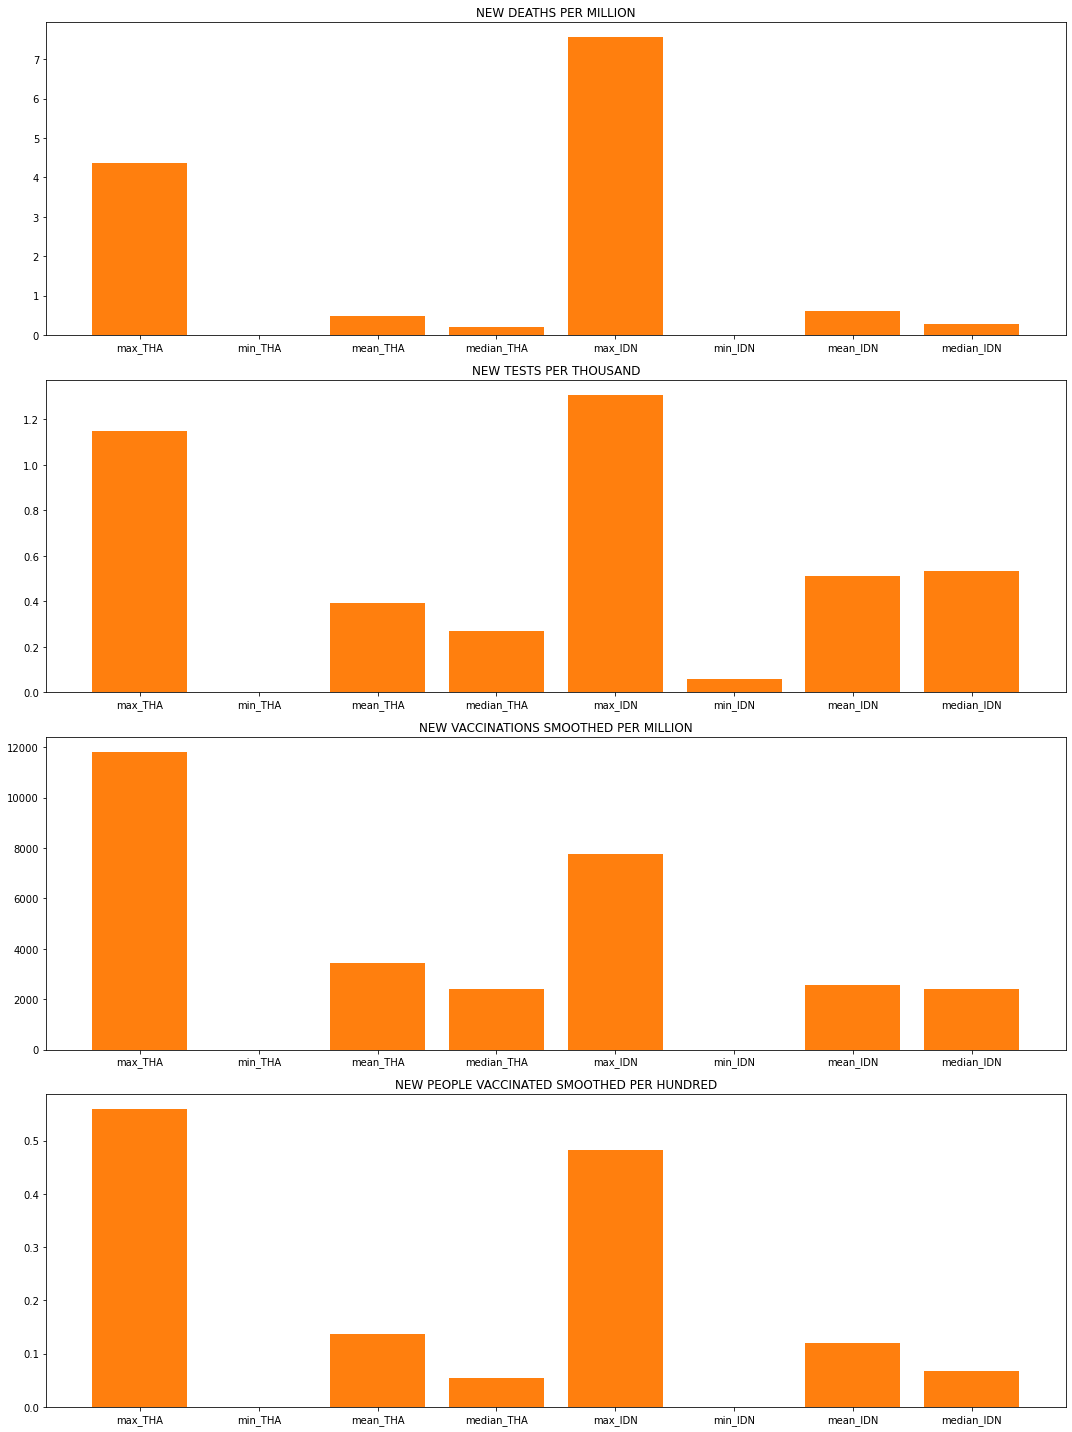

In [7]:
barplot(locations_states, d_records_vars,s_states)

## Confronto tra Continenti

### Estrazione dei dati in esame

In [21]:
locations_continents = ['OWID_NAM', 'OWID_SAM'] #codice dei continenti in esame, Europa e Nord America
covid_data_continents = extract_list_dicts(locations_continents, 'data')
pop_data_continents = extract_var(locations_continents, s_variables)

records_continents = {}
for loc in locations_continents:
    temp = {} #creo dizionario vuoto temporaneo a cui assegnare il valore di ogni record
    for r in d_records_vars:
        temp[r] = extract_list(loc, r, covid_data_continents) #inserisco nel dizionario temporaneo le chiavi record con il valore = lista dei dati del record
    records_continents[loc] = temp

{'OWID_NAM': {'population': 596315269.0, 'population_density': {}}, 'OWID_SAM': {'population': 433956670.0, 'population_density': {}}}


### Verifica del numero di valori non-zero
Per i dati relativi ai vaccini, bisognerebbe iniziare a valutare i dati dal giorno in cui i vaccini sono stati messi a disposizione per la prima volta. 
Per migliorare il codice si potrebbe sviluppare un ciclo che permetta di escludere dall'analisi i valori del record giornaliero che non superano una determinata soglia di valori non nulli sul totale.

In [22]:
find_non_zero(locations_continents, d_records_vars, records_continents)

Per la location OWID_NAM la lista con i valori del record giornaliero new_deaths_per_million continene 988 valori non-zero su 988
Per la location OWID_NAM la lista con i valori del record giornaliero new_tests_per_thousand continene 0 valori non-zero su 988
Per la location OWID_NAM la lista con i valori del record giornaliero new_vaccinations_smoothed_per_million continene 656 valori non-zero su 988
Per la location OWID_NAM la lista con i valori del record giornaliero new_people_vaccinated_smoothed_per_hundred continene 656 valori non-zero su 988
Per la location OWID_SAM la lista con i valori del record giornaliero new_deaths_per_million continene 957 valori non-zero su 957
Per la location OWID_SAM la lista con i valori del record giornaliero new_tests_per_thousand continene 0 valori non-zero su 957
Per la location OWID_SAM la lista con i valori del record giornaliero new_vaccinations_smoothed_per_million continene 645 valori non-zero su 957
Per la location OWID_SAM la lista con i valo

### Calcolo delle statistiche

In [23]:
d_records_nnvars = ['new_deaths_per_million','new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed_per_hundred'] #lista dei cmapi che presentano valori non nulli
s_continents = calculations(locations_continents, d_records_nnvars, records_continents)

### Visualizzazione delle statistiche

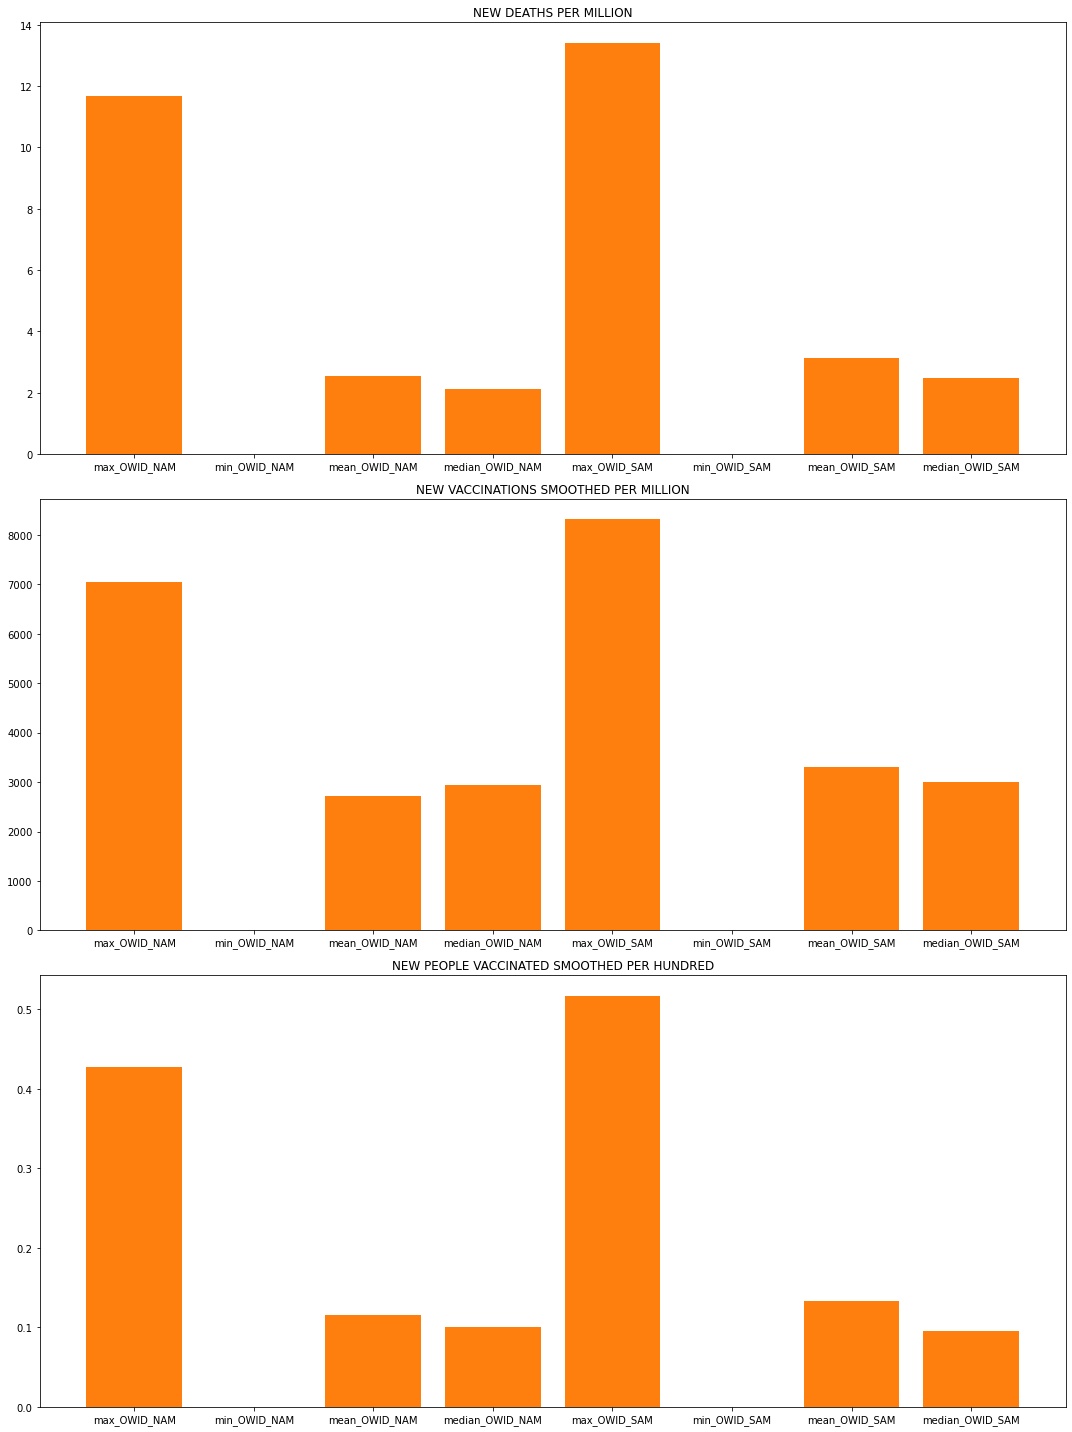

In [24]:
barplot(locations_continents, d_records_nnvars, s_continents)